In [ ]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
import os
import csv
import warnings
warnings.simplefilter('ignore')
from torchvision.datasets import ImageFolder
from torchmetrics.functional.classification import multiclass_precision
from torchmetrics.functional.classification import multiclass_recall
from google.colab import drive
from PIL import Image

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.4800, 0.4609, 0.4225), std = (0.2588, 0.2551, 0.2769))
    ])

In [ ]:
import torchvision.models
model = torchvision.models.resnet18(weights = None)

class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.linear = torch.nn.Linear(512, 397)
    self.activation = torch.nn.Softmax(1)

  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)

    return x

model.fc = Classifier()

In [ ]:
import csv

with open('/content/drive/MyDrive/labels_list.csv') as f:
  classes = list(csv.reader(f))

classes

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet_sun397 tot.txt'))

<All keys matched successfully>

In [ ]:
torch.manual_seed(1234) 

In [ ]:
device = torch.device('cuda')
model = model.to(device)


In [ ]:
model.eval()

In [ ]:
import numpy as np

def predict(model,img):
  img = transform(img)
  img = img.to(device).unsqueeze(0)
  with torch.no_grad():
    logits = model(img)
    #logits = softmax(logits)
    pre_label = logits.argmax(dim=1)
   # pre_label = torch.max(logits.data,1)

    print(pre_label)

  top5_labels = torch.topk(logits.flatten(), 5).indices
  top5_prob = torch.topk(logits.flatten(), 5).values

  print("На изображении:", classes[pre_label][0],"Номер класса:", top5_labels[0].item())
  print("Возможно также:", classes[top5_labels[1].item()][0],classes[top5_labels[2].item()][0], classes[top5_labels[3].item()][0],classes[top5_labels[4].item()][0])
 
  #classes[top5_labels[0].item()][0]
  print((top5_labels))


tensor([86], device='cuda:0')
На изображении: cavern Номер класса: 86
Возможно также: catacomb wine_cellar_barrel_storrage canyon cloister
tensor([ 86,  83, 392,  77,  99], device='cuda:0')


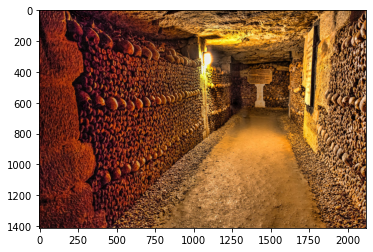

In [ ]:
from matplotlib import pyplot as plt
img = Image.open("/content/drive/MyDrive/image.jpg")
predict(model,img)
plt.imshow(img)


tensor([81], device='cuda:0')
На изображении: casino Номер класса: 81
Возможно также: temple_east_asia supermarket butchers_shop booth_indoor
tensor([ 81, 346, 338,  68,  56], device='cuda:0')


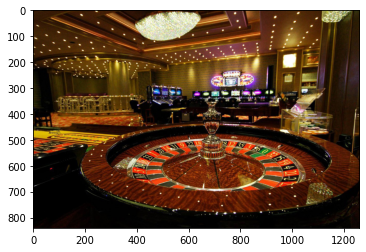

In [ ]:
img = Image.open("/content/drive/MyDrive/test0/kz.jpg")
predict(model,img)
plt.imshow(img)

tensor([10], device='cuda:0')
На изображении: aquarium Номер класса: 10
Возможно также: beach canyon sea_cliff swimming_pool_outdoor
tensor([ 10,  46,  77, 314, 342], device='cuda:0')


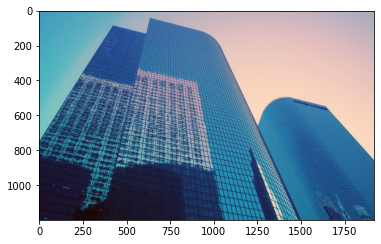

In [ ]:
img = Image.open("/content/drive/MyDrive/test0/nebos.jpg")
predict(model,img)
plt.imshow(img)

tensor([326], device='cuda:0')
На изображении: skyscraper Номер класса: 326
Возможно также: kennel_indoor temple_south_asia tower hospital
tensor([326, 210, 347, 358, 187], device='cuda:0')


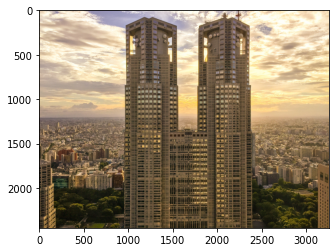

In [ ]:
img = Image.open("/content/drive/MyDrive/test0/eti-neboskr-by-bliznecy-postroeny-v-odin-den.jpg")
predict(model,img)
plt.imshow(img)